# Analysis of transactions.csv

Our second dataset was the transactions.csv dataset, which describes transactions from January 2020 to September 2022 within the bar. The variables it includes are: product code, amount of units sold, sale amounts, discount amount, profit, discount percentage, and percentage markup. We only kept product code, amount (rubles), and sale amount (rubles), as the remaining variables were not independent of each other. 

We cleaned the data according to the date and time column specifically, and removed repetitive columns like the date and time of unloading, which only provided the day an item was restocked.

In [2]:
# import packages and get data
import numpy as np
import pandas as pd
import sklearn #if this doesn't work, run in terminal: $pip3 install -U scikit-learn scipy matplotlib 
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

transactions = pd.read_csv('../data/Transactions.csv')

# Data Filtering - Transactions

# First, we filtered the date and time column to only include the date of our transactions. Our observations are sorted in increasing date order. 
# For this project we are only focusing on the sale amount of a given transaction. This means we are not concerned with the data regarding discount amount, percentage markup, discount percentage, and profit.

from datetime import datetime,date

transactions['Date_and_time_of_unloading'] = pd.to_datetime(transactions['Date_and_time_of_unloading'])
transactions['Date'] = transactions['Date_and_time_of_unloading'].dt.date
transactions = transactions.drop(columns=['Date_and_time_of_unloading'])#,'Discount_amount', 'Percentage_markup', 'Discount_percentage', 'Profit'
transactions = transactions.dropna().reset_index(drop=True)

transactions.head()

,Product_code,Amount,Sale_amount,Discount_amount,Profit,Percentage_markup,Discount_percentage,Date
0,209,2.0,545.73,294.27,75.73,16.11,35.03,2020-01-01
1,213,2.0,1265.05,34.95,653.05,106.71,2.69,2020-01-01
2,217,1.0,630.00,70.00,220.50,53.85,10.00,2020-01-01
3,222,2.0,1104.75,195.25,393.75,55.38,15.02,2020-01-01
4,243,1.0,292.36,157.64,1.36,0.47,35.03,2020-01-01


After cleaning the data, we plotted a heatmap of the remaining variables and found that there was some correlation with sale amount and amount.

/var/folders/gm/n1_ws6nd71b6h3mc4nht_zzh0000gn/T/ipykernel_34734/1631982020.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(transactions.corr(),linewidths=0.1, annot=True,cmap='YlGn')


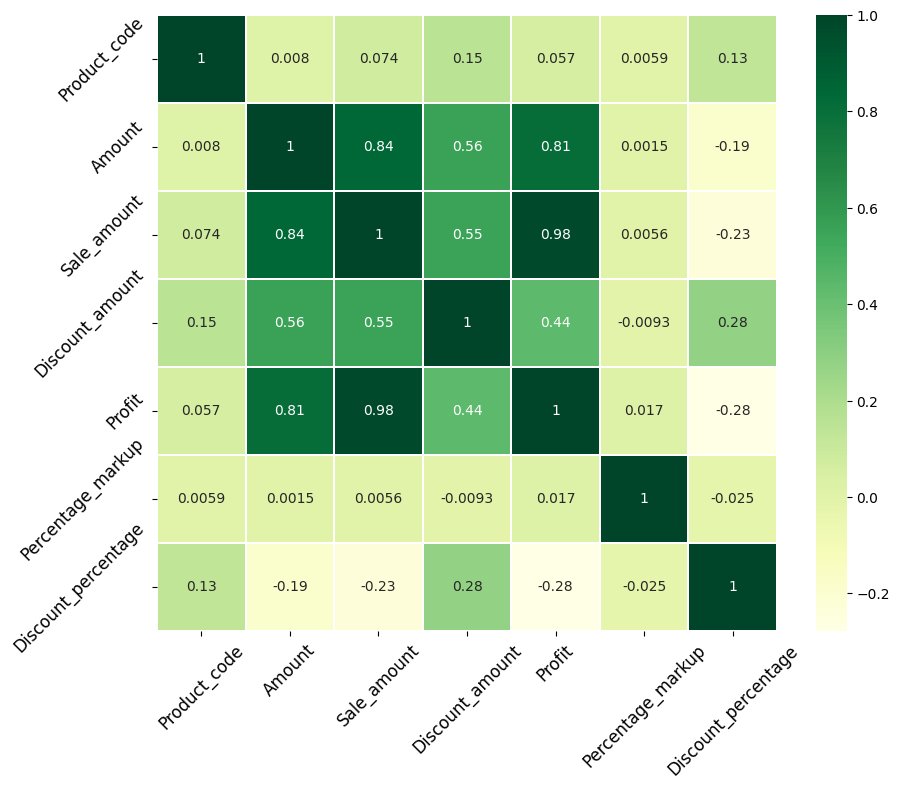

In [3]:
# Plot relationship between all variables of transactions
plt.figure(figsize=(10, 8))
sns.heatmap(transactions.corr(),linewidths=0.1, annot=True,cmap='YlGn')
plt.xticks(fontsize=12, rotation=45) 
plt.yticks(fontsize=12, rotation=45) 
plt.show()

We ran multiple linear regression on this dataset using an 80% test and a 20% split set, and created a scatterplot demonstrating the predicted labels being compared to the actual labels, in regards to sale amount and with outliers > 2000 removed. 

Our independent variables were the amount, discount amount, profit, percentage markup, discount percentage, and we attempted to predict the sale amount, since the transactions dataset does not contain a "profit" column.


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import preprocessing

split2 = int(transactions.shape[0]*0.8)

X2 = transactions[['Product_code', 'Amount', 'Discount_amount', 'Profit', 'Percentage_markup', 'Discount_percentage']]#[['Product_code','Amount']] #, 'Profit'
Y2 = transactions['Sale_amount']

X2_train, X2_test, y2_train, y2_true = train_test_split(X2, Y2, test_size = 0.8, random_state = 0)

LR_model2 = LinearRegression()
LR_model2.fit(X2_train, y2_train)
y2_pred = LR_model2.predict(X2_test)

In [5]:
from sklearn.metrics import mean_squared_error

print("The MSE is = " + str(mean_squared_error(y2_pred,y2_true)))

The MSE is = 166023.1534292382


Our MSE actually reduced from 193,000+ to 166,000+! Let's check out a plot of the actual results vs the predicted results.

Text(0, 0.5, 'Predicted')

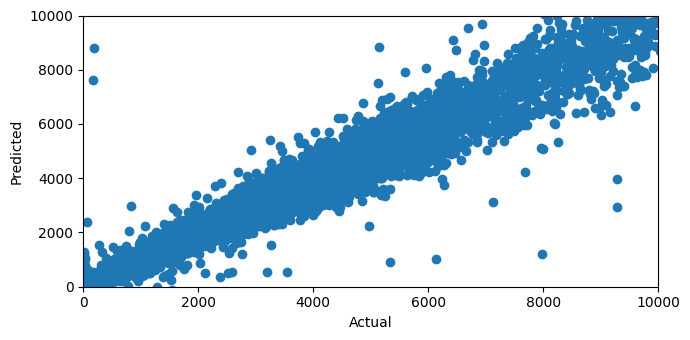

In [6]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.xlim(0,10000)
plt.ylim(0,10000)
plt.scatter(y2_true ,y2_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [7]:
r2 = r2_score(y2_true ,y2_pred)
print ("r2 score is: ", r2)


r2 score is:  0.9769780141765155


Interestingly, our r2 score for this dataset is seemingly very good. This is misleading because, although this is a good score, our MSE reveals that that our model's predictions are far from the true values.